In [1]:
#Importing packages
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import datetime
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import requests # library to handle requests

print("Libraries imported!")

Libraries imported!


In [2]:
df = pd.read_csv('data/cleaned_20000.csv', index_col=0)
df.head()

,Name,Mileage,Address,Rating,Fuel Type,City MPG,Highway MPG,Drivetrain,Engine,Exterior Color,Interior Color,Transmission,Num_ent_features,Num_safe_features,Price,Model Year,Make
0,2018 Toyota Highlander XLE,36996,"Garden Grove, CA 92843",4.4,Gasoline,21.0,27.0,FWD,Regular,Gray,Black,Automatic,1,2,30899,2018,Toyota
1,2018 Jeep Grand Cherokee Limited,28499,"Garden Grove, CA 92843",4.4,Gasoline,19.0,26.0,RWD,Regular,White,Black,Automatic,1,3,26957,2018,Jeep
2,2018 Honda Odyssey EX-L,34172,"Anaheim, CA 92806",1.3,Gasoline,19.0,28.0,FWD,Regular,White,Other,Automatic,2,4,28990,2018,Honda
3,2018 BMW X5 xDrive35i,46731,"Anaheim, CA 92804",5.0,Gasoline,18.0,24.0,AWD,DOHC Turbo,Gray,Other,Automatic,1,2,37995,2018,BMW
4,2020 Nissan Pathfinder SL,27206,"Huntington Beach, CA 92647",3.7,Gasoline,20.0,27.0,FWD,Regular,Silver,Charcoal,Automatic,1,3,23984,2020,Nissan


In [3]:
df = df[['Make', 'Model Year', 'Mileage', 'Address', 'Rating', 'Fuel Type', 'City MPG', 'Highway MPG', 'Drivetrain', 'Engine', 'Exterior Color',
        'Interior Color', 'Transmission', 'Num_ent_features', 'Num_safe_features', 'Price']]

In [4]:
numeric_subset = ['Model Year', 'Mileage', 'Rating', 'City MPG', 'Highway MPG', 'Num_ent_features', 'Num_safe_features', 'Price']

In [5]:
sub_df = df.loc[:,numeric_subset]
sub_df.head()

,Model Year,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features,Price
0,2018,36996,4.4,21.0,27.0,1,2,30899
1,2018,28499,4.4,19.0,26.0,1,3,26957
2,2018,34172,1.3,19.0,28.0,2,4,28990
3,2018,46731,5.0,18.0,24.0,1,2,37995
4,2020,27206,3.7,20.0,27.0,1,3,23984


In [6]:
sub_df.corr()

,Model Year,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features,Price
Model Year,1.000000,-0.748170,-0.092441,0.056528,0.017872,0.279458,0.476804,0.274647
Mileage,-0.748170,1.000000,0.047118,-0.095298,-0.041600,-0.258693,-0.415620,-0.332991
Rating,-0.092441,0.047118,1.000000,0.001478,0.018113,-0.003282,-0.027883,0.046047
City MPG,0.056528,-0.095298,0.001478,1.000000,0.440074,-0.040929,0.139952,-0.111454
Highway MPG,0.017872,-0.041600,0.018113,0.440074,1.000000,-0.020551,0.043173,-0.005053
Num_ent_features,0.279458,-0.258693,-0.003282,-0.040929,-0.020551,1.000000,0.217222,0.240277
Num_safe_features,0.476804,-0.415620,-0.027883,0.139952,0.043173,0.217222,1.000000,0.062512
Price,0.274647,-0.332991,0.046047,-0.111454,-0.005053,0.240277,0.062512,1.000000


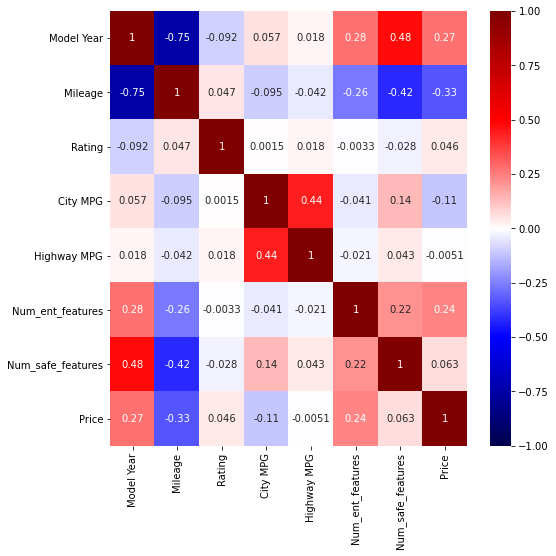

In [7]:
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(sub_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

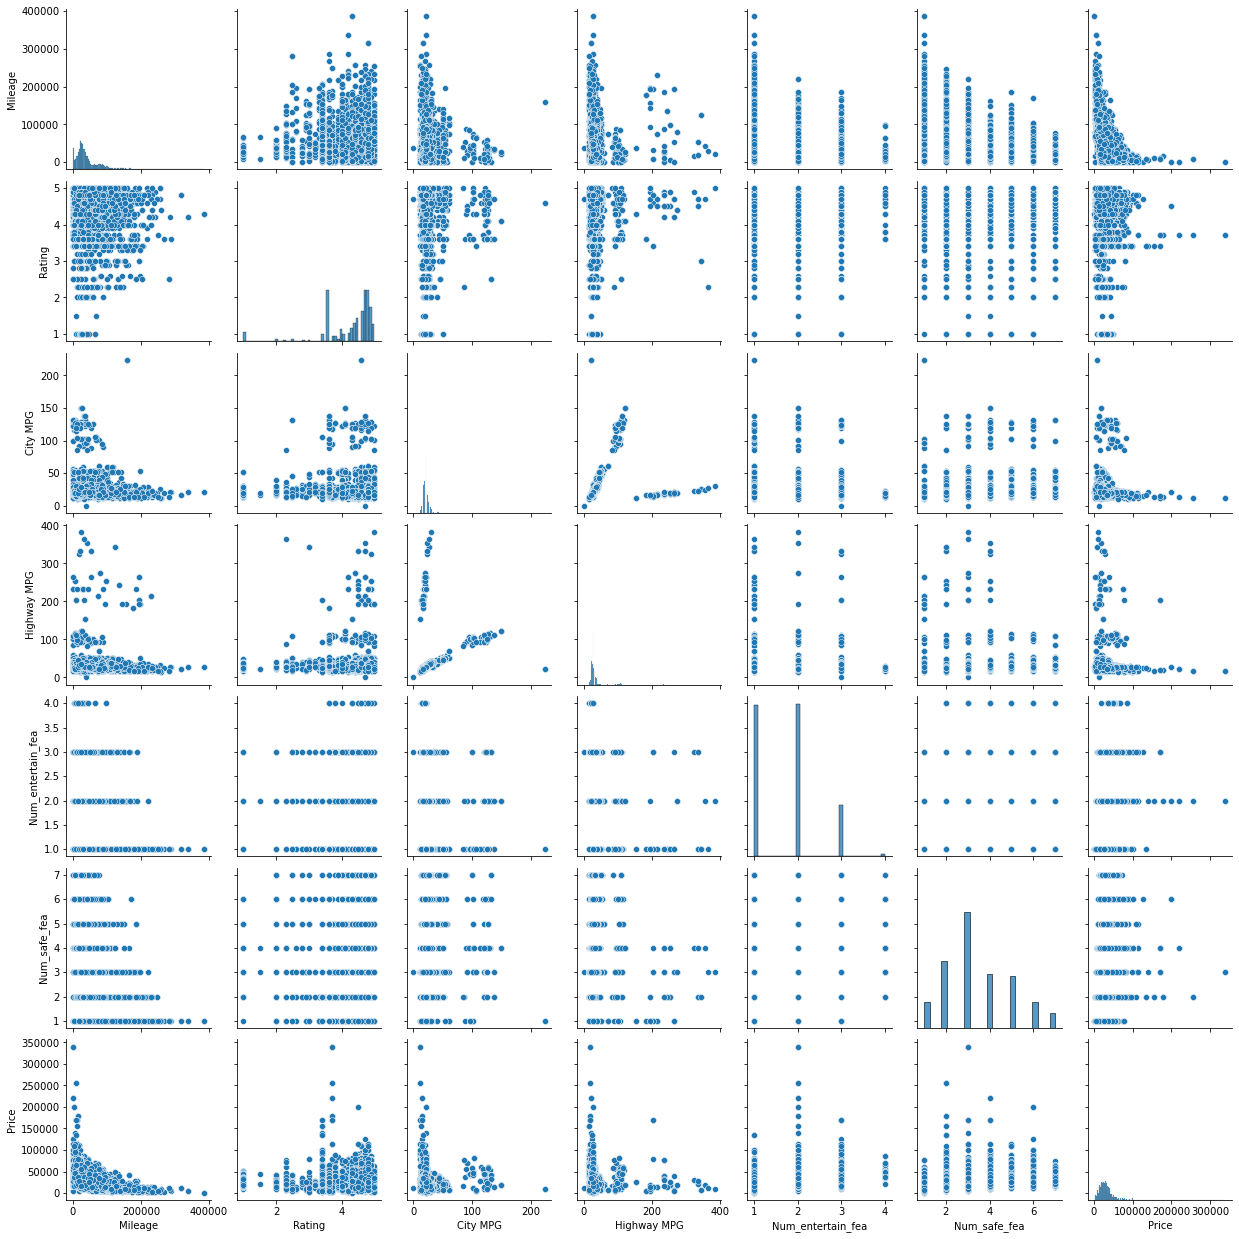

In [9]:
sns.pairplot(sub_df)

In [8]:
x_df = sub_df[['Model Year', 'Mileage', 'Rating', 'City MPG', 'Highway MPG', 'Num_ent_features', 'Num_safe_features']]
y_df = sub_df['Price']
lsm = LinearRegression()
sk_fit = lsm.fit(x_df, y_df)
sk_fit.score(x_df, y_df)

0.16989816907375066

,Mileage,Rating,City MPG,Highway MPG,Num_entertain_fea,Num_safe_fea,Price
0,151000,3.0,28.0,39.0,1,2,6900
1,76956,4.8,54.0,50.0,1,3,15000
2,7633,4.2,27.0,35.0,2,5,23598
3,27188,4.5,25.0,31.0,2,5,25900
4,20404,4.2,21.0,27.0,2,6,26996
...,...,...,...,...,...,...,...
10692,86836,4.8,21.0,234.0,1,2,29495
10693,179561,4.8,13.0,17.0,1,1,6999
10694,127717,4.8,21.0,28.0,1,3,15495
10695,48130,4.8,21.0,28.0,1,1,25900
